In [1]:
# import libraries
# Always run this cell first!
import numpy as np
import pandas as pd
import math

import scipy
import statsmodels.api # appear to need to import the api as well as the library itself for the interpreter to find the modules
import statsmodels as sm

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import plotly.offline
plotly.offline.init_notebook_mode(connected=True) # make plotly work with Jupyter Notebook using CDN

# an extra function for plotting a straight line
def plot_abline(slope, intercept, color = None, x_name = "x", y_name = "y"):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(
        x_vals, y_vals, '--', color = color,
        label = f"${y_name} = {slope:.2f}{x_name} " + ("-" if intercept < 0 else "+") + f"{abs(intercept):.2f}$"
    )

# Solutions to Exercises

## Foundations of Statistical Inference

### Exercise 1

#### 1. Use the widget above to construct 25 different 90% confidence intervals for the average weekly wages of Premier League players. How many of the 25 contain the true population mean? Is this the number you expect? Would it be possible for exactly 90% of the intervals to contain the true population mean?

I observed 23/25 = 96% of the 90% confidence intervals contained the true average. (You may observe a different percentage because the random samples in the widget will be different each time the code is run.) It would not be possible to observe exactly 95% since 95% of 25 is 22.5.

#### 2. Choose your own confidence level, and construct a single confidence interval for the average weekly wages of a Premier League player. Describe your interval in a complete sentence.

I constructed a 98% confidence interval on a sample of 45 players. Since this confidence level is high, the interval was quite wide.

I have 98% confidence that the true average weekly salary is between 48366.561 and 110522.328 GBP.

## Hypothesis Testing for Categorical Data

### Exercise 1

#### 1. Pick another country (perhaps your country of origin or another country you are interested in) and filter the observations to just include responses from that country.

For this sample solution, we have chosen to look at trust in scientists in Ethiopia. (To pick a different country, change the value of the variable `country1`.)

After loading in the Wellcome Global Monitor survey data (click [here](wellcome_global_monitor_2018.csv) to download a copy), we create a new dataframe called `wgm_country1` that includes only the observations for Ethiopia.

In [2]:
country1 = "Ethiopia"
wgm = pd.read_csv("wellcome_global_monitor_2018.csv")
wgm_country1 = wgm[wgm["Country"] == country1]

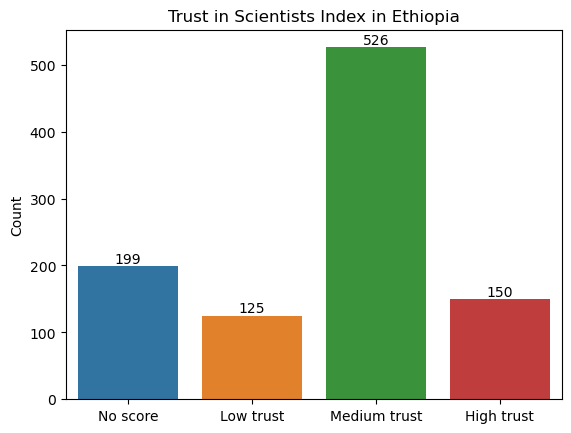

In [3]:
# create dataframe from counts of "Trust_Index" values
levels = wgm_country1["Trust_Index"].value_counts().reset_index(name="Count").rename(columns={"index": "Trust_Index"})

# create bar plot
ax = sns.barplot(
    data = levels,
    x = "Trust_Index",
    y = "Count",
    order = ["No score", "Low trust", "Medium trust", "High trust"]
)

# label each bar with the corresponding value
for container in ax.containers:
    ax.bar_label(container)

# set axis labels and title
ax.set_xlabel("")
ax.set_title(f"Trust in Scientists Index in {country1}");

#### 2. Make a hypothesis about the proportion of all the people in your chosen country that have high trust in scientists. For example, do you think it is over 20%? Under 15%? Make any hypothesis you like.

Our null hypothesis is that the proportion of people with high trust in scientists in Ethiopia is 15%. Our alternative hypothesis is that the proportion is not 15%. Note that this is a two-sided hypothesis.

\begin{equation}
    H_0: p = 0.15, \\
    H_1: p \neq 0.15.
\end{equation}


#### 3. Choose a level of $\alpha$.

We will choose to set $\alpha = 0.1$.

In [4]:
alpha = 0.1

#### 4. Compute the value of $\hat p$.

Here is the code to calculate $\hat{p}$.

In [5]:
# number of successes (i.e., people with high trust in scientists)
count = len(wgm_country1[wgm_country1["Trust_Index"] == "High trust"])

# sample size (i.e., the total number of observations)
nobs = len(wgm_country1["Trust_Index"])

# compute sample proportion
p_hat =  count / nobs
print(f"The sample proportion is {p_hat:.3f}. There are {nobs} total observations.")

The sample proportion is 0.150. There are 1000 total observations.


The sample proportion is 15%, which seems to support our null hypothesis. However, this isn't enough evidence to make a conclusion yet, since the sample proportion is variable and won't be exactly the same as the population proportion. We need to conduct a hypothesis test before we can make our conclusion.

#### 5. Run a hypothesis test using `statsmodels`.

Here is the code to conduct the hypothesis test using `statsmodels`. We can use the same variables `count` and `nobs` that we defined earlier. Note that we set `alternative` to "two-sided" because our alternative hypothesis is that $p \neq 0.15$.

In [6]:
p0 = 0.15 # proportion under null hypothesis
(stat, pval) = sm.stats.proportion.proportions_ztest(
    count = count, # number of successes
    nobs = nobs, # number of observations
    value = p0,
    alternative = "two-sided",
    prop_var = p0, # use proportion under null hypothesis to calculate variance for test statistic
)
print(f"Z-test for proportion: test statistic is {stat:.3f}, P-value is {pval:.3f}.")

Z-test for proportion: test statistic is 0.000, P-value is 1.000.


#### 6. Write your conclusion in a complete sentence. Be sure to report the test statistic and the $P$-value. If you found a significant result, give a confidence interval for the proportion.
Our $P$-value is 1, which is greater than our threshold of $\alpha = 0.1$. So we fail to reject the null hypothesis that the proportion of people in Ethiopia with high trust in scientists is 15%.

### Exercise 2

#### 1. Pick a second country of interest.

For this sample solution, we have chosen Ecuador as the second country. (To pick a different country, change the value of the variable `country2`.) As before, we create a new dataframe called `wgm_country2` that includes only the observations for Ecuador.

In [7]:
country2 = "Ecuador"
wgm_country2 = wgm[wgm["Country"] == country2]

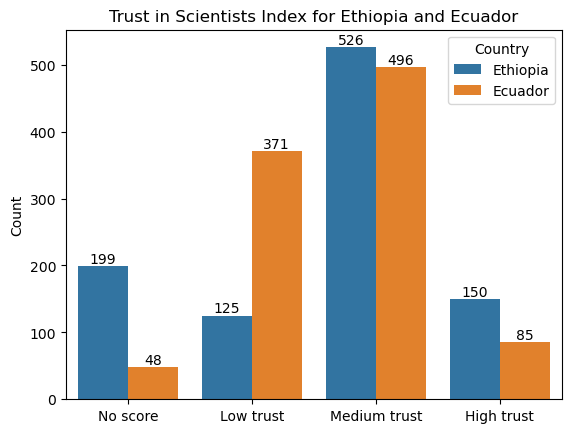

In [8]:
levels = pd.concat([wgm_country1, wgm_country2])[["Country", "Trust_Index"]].value_counts().reset_index(name="Count")

# create bar plot
ax = sns.barplot(
    data = levels,
    x = "Trust_Index",
    y = "Count",
    hue = "Country",
    order = ["No score", "Low trust", "Medium trust", "High trust"]
)
for container in ax.containers:
    ax.bar_label(container)
ax.set_xlabel("")
ax.set_title(f"Trust in Scientists Index for {country1} and {country2}");

#### 2. Write hypotheses to test whether the proportion of people in the first country with high trust in scientists is higher than the same proportion in the second country.

Our null hypothesis is that the proportion of people who have high trust in scientists in Ethiopia ($p_1$) is the same as the proportion of people who have high trust in scientists in Ecuador ($p_2$). Our alternative hypothesis is that the proportion of people who have high trust in scientists in Ethiopia is higher than the corresponding proportion in Ecuador ($p_1 > p_2$).

\begin{equation}
    H_0: p_1 - p_2 = 0, \\
    H_1: p_1 - p_2 > 0.
\end{equation}

(Recall that the null hypothesis should always be in the form "population parameter equals something". So when we are asked to hypothesize that the first proportion is higher than the second proportion, that means that it is our alternative hypothesis that is $p_1 - p_2 > 0$, not our null hypothesis.)

#### 3. Choose a level of $\alpha$.

As before, we will choose $\alpha = 0.1$.

In [9]:
alpha = 0.1

#### 4. Run the hypothesis test using `statsmodels`.

Here is the code to conduct the hypothesis test using `statsmodels`. Note that we set `alternative` to "larger" because our alternative hypothesis is that $p_1 - p_2 > 0$.

In [10]:
# number of successes (i.e., people with high trust in scientists)
count1 = len(wgm_country1[wgm_country1["Trust_Index"] == "High trust"])
count2 = len(wgm_country2[wgm_country2["Trust_Index"] == "High trust"])

# sample size (i.e., the total number of observations)
nobs1 = len(wgm_country1["Trust_Index"])
nobs2 = len(wgm_country2["Trust_Index"])

# run the hypothesis test using statsmodels
p0 = 0 # proportion under null hypothesis
(stat, pval) = sm.stats.proportion.proportions_ztest(
    count = [
        count1, # number of successes for sample 1
        count2, # number of successes for sample 2
    ],
    nobs = [
        nobs1, # number of observations for sample 1
        nobs2, # number of observations for sample 2
    ],
    value = p0,
    alternative = "larger",
    prop_var = False, # use pooled sample proportion to calculate variance for test statistic
)
print(f"Z-test for difference of two proportions: test statistic is {stat:.3f}, P-value is {pval:.3f}.")

Z-test for difference of two proportions: test statistic is 4.514, P-value is 0.000.


#### 5. Write your conclusion in a complete sentence. Be sure to report the test statistic and the $P$-value. If you found a significant difference, give a confidence interval for the difference in proportions.

Our $P$-value is 0, which is smaller than our threshold of $\alpha = 0.1$. So we reject the null hypothesis in favor of the alternative hypothesis that the proportion of people in Ethiopia with high trust in scientists is larger than the corresponding proportion of people in Ecuador. 

In [11]:
salaries = pd.read_csv("EPL_wages_22_23.csv").drop(columns=["Rk","Notes", "Player-additional","Annual Wages"])
salaries["Weekly Wages (GBP)"] = salaries["Weekly Wages"].str.extract('(\d+)').astype(int)

my_sample = salaries.sample(n=45)
sample_mean = my_sample["Weekly Wages (GBP)"].mean()
sample_sd = my_sample["Weekly Wages (GBP)"].std()

confidence_level = 0.98
(lower_ci, upper_ci) = scipy.stats.norm.interval(
    confidence_level,
    loc=sample_mean,
    scale=sample_sd/np.sqrt(45)
)
print(f"98% confidence interval is ({lower_ci:.3f}, {upper_ci:.3f}).")

98% confidence interval is (42775.636, 90913.253).


## Hypothesis Testing for Numerical Data

### Exercise 1

#### 1. Find the average bill length for Gentoo penguins from the [Encyclopedia of Life](https://eol.org/pages/45512076). Use this information to form null and alternative hypotheses, making sure to note the units.

The average Gentoo penguin has a bill length of 53.8 mm.

#### 2. What is the sample size you have? Does the distribution of bill lengths appear to meet the normality assumption needed to perform the T-test?

There are 992 elements in the dataframe. This is a large number, so we don't strictly need the normality assumption due to the CLT. However, the histogram shows that the normality assumption is reasonable.

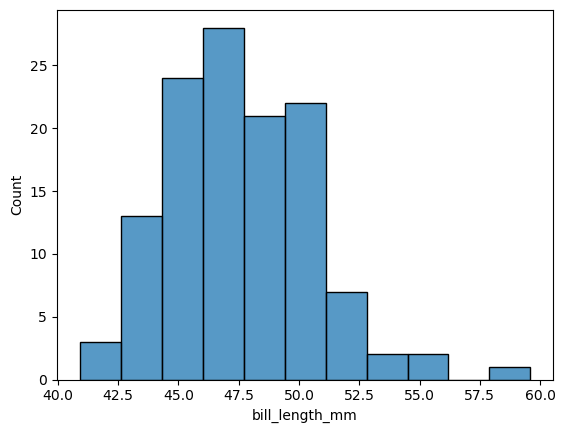

In [12]:
from palmerpenguins import load_penguins
penguins = load_penguins()

gentoo = penguins[penguins['species'] == 'Gentoo']
gentoo.size

sns.histplot(
    data = gentoo,
    x = 'bill_length_mm',
);

#### 3. Perform the test and report the test statistic and $P$-value.

In [13]:
result = scipy.stats.ttest_1samp(
    gentoo['bill_length_mm'].dropna(),
    popmean = 53.8,
    alternative = 'two-sided',
)
print(f"T-test for mean: test statistic is {result.statistic:.3f} with {gentoo.size-1} degrees of freedom.\nP-value is {result.pvalue:.3f}.")

T-test for mean: test statistic is -22.654 with 991 degrees of freedom.
P-value is 0.000.


#### 4. What do you conclude? If you find a significant difference, give a confidence interval for average bill length.

The small P-value indicates that there is a significant difference in the bill lengths in the sample and the hypothesized mean of 53.8mm. A 95% confidence interval for the average bill length is 46.955 to 48.055 mm.

In [14]:
confidence_level = 0.95
(lower_ci, upper_ci) = result.confidence_interval(confidence_level) # use the result object from the t-test
print(f"95% confidence interval is ({lower_ci:.3f}, {upper_ci:.3f}).")

95% confidence interval is (46.955, 48.055).


## Linear Regression

### Exercise 1

In [19]:
epl = pd.read_csv('epl_table_22_23.csv')
epl.head()

,team,wins,draws,losses,points,goals_for,goals_against,goal_diff,expected_goals_for,expected_goals_against,expected_goal_diff,attendance
0,Arsenal,26,6,6,84,88,43,45,71.9,42.0,29.9,60191
1,Aston Villa,18,7,13,61,51,46,5,50.2,52.5,-2.2,39485
2,Bournemouth,11,6,21,39,37,71,-34,38.6,63.9,-25.3,10362
3,Brentford,15,14,9,59,58,46,12,56.8,49.9,6.8,17078
4,Brighton,18,8,12,62,72,53,19,73.3,50.2,23.1,31477


#### 1. Make a scatter plot of the number of goals a team scored (`goals_for`) versus the number of points they accrued in the standings (`points`). How would you describe the relationship?

The relationship is positive, and somewhat linear.

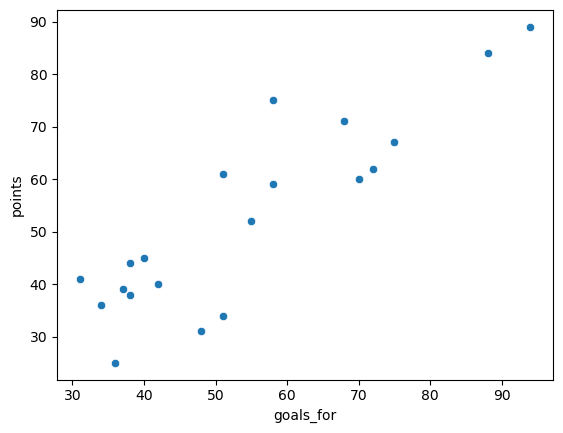

In [20]:
sns.scatterplot(
    data = epl,
    x = 'goals_for',
    y = 'points'
);

#### 2. Fit a linear model to these two variables, and print out the summary.

In [21]:
lin_mod = sm.regression.linear_model.OLS(
    epl['points'],
    sm.tools.tools.add_constant(epl['goals_for'])
)

results = lin_mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     61.44
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           3.27e-07
Time:                        14:27:49   Log-Likelihood:                -71.037
No. Observations:                  20   AIC:                             146.1
Df Residuals:                      18   BIC:                             148.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6042      6.323      0.886      0.3

#### 3. Use the summary to write down the estimated slope and intercept of the model. Interpret these values in the context of the problem. How many points, on average, is each additional goal scored in the standings worth?

The summary gives an estimate line of $\hat points = 5.6042 + .868 * goalsfor$. This means that each goal is worth on average .868 points in the standings.

#### 4. What is the value of $r^2$? Does the model seem to be a good fit? Explain your reasoning.

$r^2$ is about 0.773, indicating that about 77% of the variation in points is explained by the number of goals a team scores. This is a good fit.

#### 5. Provide diagnostic plots and comment on the results.

The residuals have no pattern and appear to be roughly mound-shaped. So the assumptions seem valid.

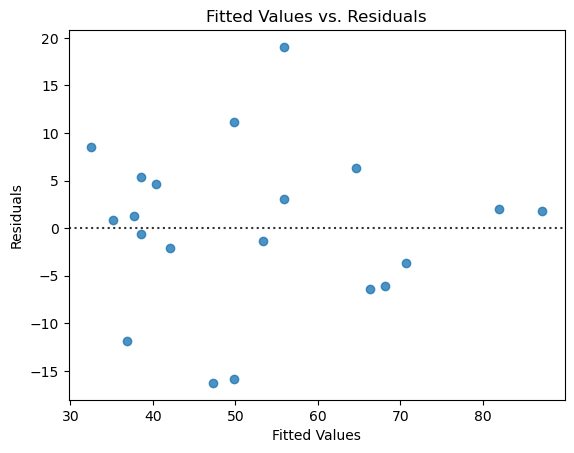

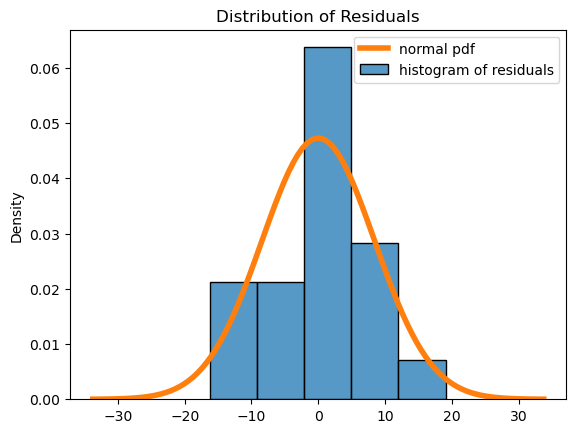

In [22]:
# plot residuals scatterplot
fig, ax = plt.subplots()
sns.residplot(
    x = results.fittedvalues,
    y = results.resid,
    ax = ax,
)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title("Fitted Values vs. Residuals");

# plot residuals histogram
fig, ax = plt.subplots()
palette = iter(sns.color_palette())
sns.histplot(
    x = results.resid,
    stat = 'density',
    color = next(palette),
    label = "histogram of residuals",
    bins=5
)
std = np.std(results.resid)
x = np.linspace(-std*4, std*4, 100)
plt.plot(
    x,
    scipy.stats.norm.pdf(x, loc=np.mean(results.resid), scale=std),
    color = next(palette),
    linewidth = 4,
    label = "normal pdf"
)
plt.title("Distribution of Residuals")
plt.legend();

#### 6. Repeat this analysis with another variable or variables. Do your new models seem to be a better or worse fit? Why or why not?

I repeated this using `goals_against`. The fit is slightly worse, with an $r^2$ of 0.685. Each additional goal against is worth on average 1.17 fewer points in the standings. The diagnostics show that the assumptions are valid. There aren't quite enough points to evaluate the normality of the residuals, but depending on the number of bins in the histogram the plot looks more or less mound-shaped.

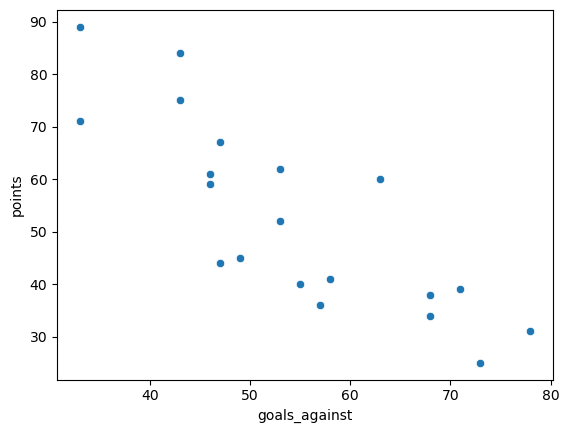

In [23]:
sns.scatterplot(
    data = epl,
    x = 'goals_against',
    y = 'points'
);

In [24]:
lin_mod = sm.regression.linear_model.OLS(
    epl['points'],
    sm.tools.tools.add_constant(epl['goals_against'])
)

results = lin_mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     39.09
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           6.75e-06
Time:                        14:27:50   Log-Likelihood:                -74.341
No. Observations:                  20   AIC:                             152.7
Df Residuals:                      18   BIC:                             154.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           116.5044     10.479     11.117

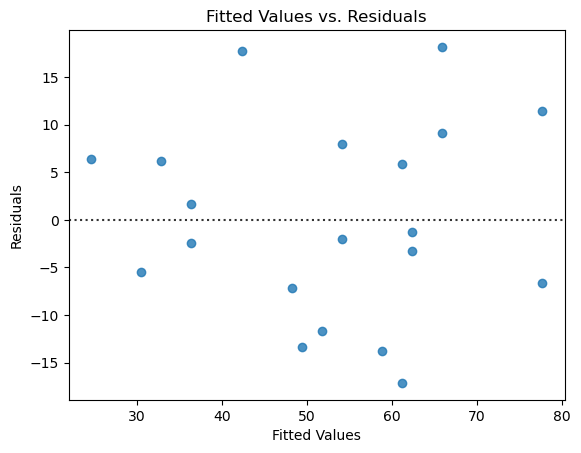

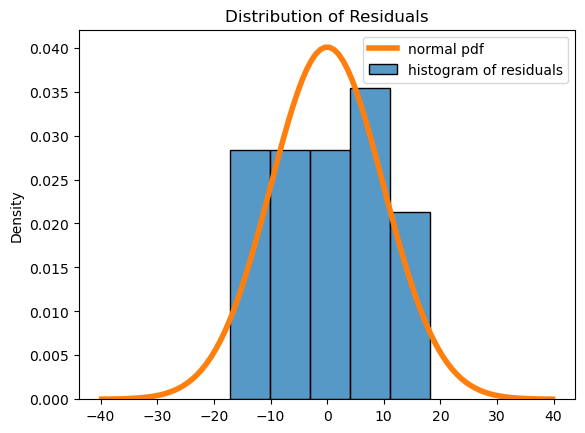

In [25]:
# plot residuals scatterplot
fig, ax = plt.subplots()
sns.residplot(
    x = results.fittedvalues,
    y = results.resid,
    ax = ax,
)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title("Fitted Values vs. Residuals");

# plot residuals histogram
fig, ax = plt.subplots()
palette = iter(sns.color_palette())
sns.histplot(
    x = results.resid,
    stat = 'density',
    color = next(palette),
    label = "histogram of residuals",
    bins=5
)
std = np.std(results.resid)
x = np.linspace(-std*4, std*4, 100)
plt.plot(
    x,
    scipy.stats.norm.pdf(x, loc=np.mean(results.resid), scale=std),
    color = next(palette),
    linewidth = 4,
    label = "normal pdf"
)
plt.title("Distribution of Residuals")
plt.legend();

6. Do you think `attendance` has any effect on a team's performance? Use some of the tools from this section to answer, and explain what you find. How might you use this example to help understand the common phrase "correlation is not causation"?

I would think that attendance has no effect on the results, or perhaps a slightly positive effect. This is shown in the model results, which find a weak $r^2$ of 0.326, with each additional 1000 people in average attendance worth on average $1000 * .0006 = .6$ points in the standings.

These two variables are correlated, but it is not clear whether one causes the other! Do more people show up to watch good teams, or does more fans cheering help the team win more often? There are lots of things at play here, and no direct causation can be drawn here.

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     8.697
Date:                Thu, 20 Jul 2023   Prob (F-statistic):            0.00858
Time:                        14:28:26   Log-Likelihood:                -81.941
No. Observations:                  20   AIC:                             167.9
Df Residuals:                      18   BIC:                             169.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.0933      9.006      3.119      0.0

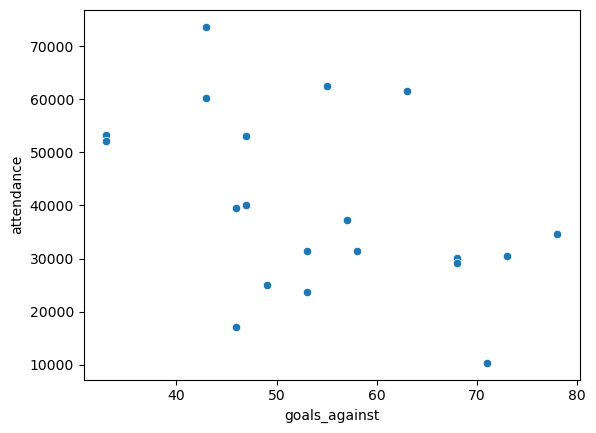

In [30]:
sns.scatterplot(
    data = epl,
    x = 'goals_against',
    y = 'attendance'
)

lin_mod = sm.regression.linear_model.OLS(
    epl['points'],
    sm.tools.tools.add_constant(epl['attendance'])
)

results = lin_mod.fit()
print(results.summary())

### Exercise 2

#### 1. How many different levels (i.e., possible categories) are in the `species` variable? How does the software handle the `species` variable? 

The species variable has three levels, so the software creates two additional dummy variables to handle this.

In [27]:
from palmerpenguins import load_penguins
penguins = load_penguins()

x = penguins[['sex', 'species',  'flipper_length_mm']]
y = penguins['body_mass_g']

x = pd.get_dummies(x, drop_first="TRUE", dtype=int)

x.head()

,flipper_length_mm,sex_male,species_Chinstrap,species_Gentoo
0,181.0,1,0,0
1,186.0,0,0,0
2,195.0,0,0,0
3,NaN,0,0,0
4,193.0,0,0,0


#### 2. Are all the variables providing useful information in your model? How can you tell?

It looks like all the variables are providing useful information based on the $P$-values. However, the intercept doesn't appear to be useful.

In [28]:
mod = sm.regression.linear_model.OLS(
    y,
    sm.tools.tools.add_constant(x), 
    missing='drop'
)

results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     530.0
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          6.14e-144
Time:                        14:27:51   Log-Likelihood:                -2432.0
No. Observations:                 342   AIC:                             4874.
Df Residuals:                     337   BIC:                             4893.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -357.1853    533.37

#### 3. Describe the typical characteristics of a very large or very small penguin.

A penguin with large mass would be a male Gentoo with large flipper length. A small penguin would be a female Chinstrap with small flipper length.

#### 4. Provide diagnostics for your model and comment on the validity of the regression assumptions.

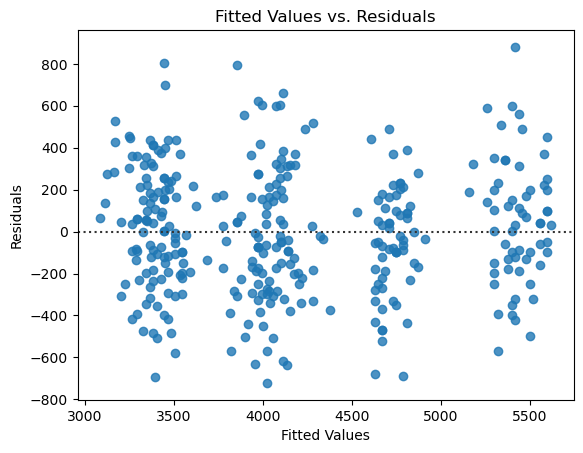

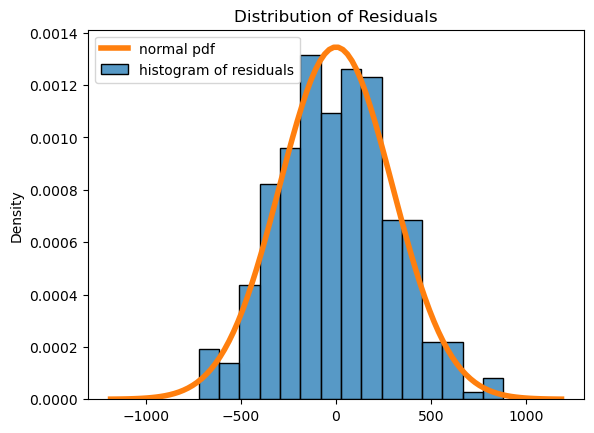

In [29]:
# plot residuals scatterplot
fig, ax = plt.subplots()
sns.residplot(
    x = results.fittedvalues,
    y = results.resid,
    ax = ax,
)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title("Fitted Values vs. Residuals");

# plot residuals histogram
fig, ax = plt.subplots()
palette = iter(sns.color_palette())
sns.histplot(
    x = results.resid,
    stat = 'density',
    color = next(palette),
    label = "histogram of residuals"
)
std = np.std(results.resid)
x = np.linspace(-std*4, std*4, 100)
plt.plot(
    x,
    scipy.stats.norm.pdf(x, loc=np.mean(results.resid), scale=std),
    color = next(palette),
    linewidth = 4,
    label = "normal pdf"
)
plt.title("Distribution of Residuals")
plt.legend();

The diagnostics look great!